In [341]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [342]:
data = pd.read_csv('survey.csv')

In [343]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [344]:
print(data['Gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [345]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [346]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [347]:
print(data.isnull().sum())

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


**Heatmap ile Eksik Verilerin Görselleştirilmesi**
Bu tür bir görselleştirme, verinizde eksik verilerin hangi sütunlarda ve ne kadar olduğunu anlamanıza yardımcı olur.

- **Grafikte:**
- Sarı çizgiler eksik değerleri göstermektedir.
- Mor alanlar ise eksik olmayan verileri göstermektedir.

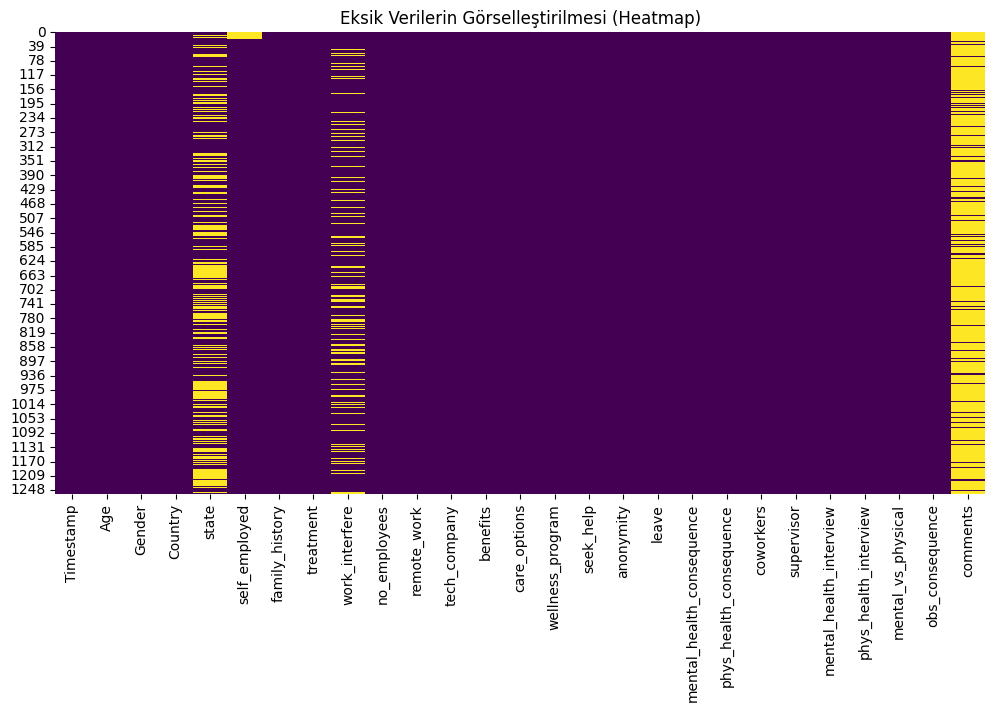

In [348]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Eksik Verilerin Görselleştirilmesi (Heatmap)')
plt.show()

In [349]:
print(data['Gender'].value_counts())



Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female                                              2
Female (trans)                                      2
Male-ish                                            1
Trans-female                                        1
Male (CIS)                                          1
Mal                  

In [350]:
#Normalizasyon
data['Gender'] = data['Gender'].replace(['Male', 'male', 'M'], 'Male')
data['Gender'] = data['Gender'].replace(['Female', 'female', 'F'], 'Female')


In [351]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])


In [352]:
print(data['Gender'].unique())

[ 9 18 34 21 35 27  4 43  5 28 31 17 20 42 38  8 44 16 24  2  7 33 13 10
  3  1 30 14 36 19 23 26 37 25 12 41 11 15 29  0 22 40 32  6 39]


In [353]:
missing_ratio = data['comments'].isnull().sum() / len(data)
print(f"Missing Ratio: {missing_ratio:.2%}")

Missing Ratio: 86.97%


In [354]:
missing_ratio = data['self_employed'].isnull().sum() / len(data)
print(f"Missing Ratio: {missing_ratio:.2%}")

Missing Ratio: 1.43%


In [355]:
data.drop(columns=['comments'], inplace=True)


In [356]:
#state not important
if 'state' in data.columns:
	data.drop(columns=['state'], inplace=True)
else:
	print("Column 'state' does not exist in the dataframe.")


In [357]:
# Eğer "No" daha yaygınsa ve veri setindeki eksik değerleri "Yes" ile doldurursanız, veri setindeki oranlar değişebilir ve bu modelin sonuçlarını yanıltıcı hale getirebilir.
data['self_employed'] = data['self_employed'].fillna('No')


In [358]:
#kişinin bu konuda bir bilgiye sahip olmadığı anlamına geldi
data['work_interfere'].fillna('Don’t know', inplace=True)


C:\Users\iremg\AppData\Local\Temp\ipykernel_10812\1046800771.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['work_interfere'].fillna('Don’t know', inplace=True)


In [359]:
missing_rows = data[data.isnull().any(axis=1)]
print(missing_rows)

Empty DataFrame
Columns: [Timestamp, Age, Gender, Country, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence]
Index: []

[0 rows x 25 columns]


In [360]:

print(data.isnull().sum())

# Eksik değer oranları (%)
missing_ratio = (data.isnull().sum() / len(data)) * 100
print(missing_ratio)


Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64
Timestamp                    0.0
Age                          0.0
Gender                       0.0
Country                      0.0
self_employed                0.0
family_history               0.0
treatment     

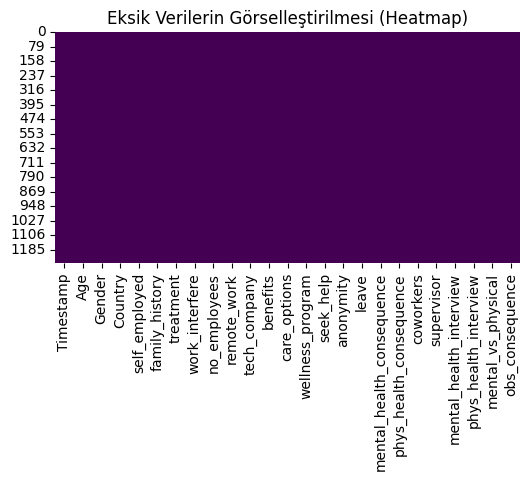

In [361]:
plt.figure(figsize=(6,3))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Eksik Verilerin Görselleştirilmesi (Heatmap)')
plt.show()

In [362]:
data.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,9,United States,No,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,18,United States,No,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,18,Canada,No,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,18,United Kingdom,No,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,18,United States,No,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [363]:
# Veri setini tekrar yükleyin
data = pd.read_csv('survey.csv')

# Gender sütunundaki tüm benzersiz değerleri kontrol edin
print(data['Gender'].unique())


['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [364]:
print(data['Gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [365]:
# Daha kapsamlı normalizasyon
data['Gender'] = data['Gender'].str.strip()  # Boşlukları temizleme

# 'Male' olarak sınıflandırılacak değerler
male_labels = [
    'M', 'Male', 'male', 'm', 'Make', 'cis male', 'Cis Male', 'guy (-ish)',
    'Mail', 'Mal', 'maile', 'msle', 'male ', 'cis man', 'Malr', 'Male-ish', 'msl', 'Guy', 'Man','Male (CIS)'
]
data['Gender'] = data['Gender'].replace(male_labels, 'Male')

# 'Female' olarak sınıflandırılacak değerler
female_labels = [
    'F', 'Female', 'female', 'f', 'Cis Female', 'femail', 'woman', 'fem',
    'Trans-female', 'femake', 'femal', 'female ', 'Femake', 'Woman', 'female (cis)', 
    'Femake', 'Female (cis)', 'Fem', 'f', 'p', 'Female (trans)'
]
data['Gender'] = data['Gender'].replace(female_labels, 'Female')

# 'Other' olarak sınıflandırılacak değerler
other_labels = [
    'Trans', 'something kinda male?', 'Androgyn','Androgyne', 'Agender', 'Neuter', 
    'queer', 'All', 'Enby', 'fluid', 'non-binary', 'genderqueer', 'androgyne',
    'nah', 'queer/she/they', 'Genderqueer', 'A little about you', 'Nah', 
    'Other', 'Trans woman', 'queer', 'Androgynous', 'cis-female/femme', 
    'Guy (-ish) ^_^', 'male leaning androgynous', 'Female (trans)'
]
data['Gender'] = data['Gender'].replace(other_labels, 'Other')

# Sonuçları kontrol edin
print(data['Gender'].unique())



['Female' 'Male' 'Other' 'Cis Man'
 'ostensibly male, unsure what that really means']


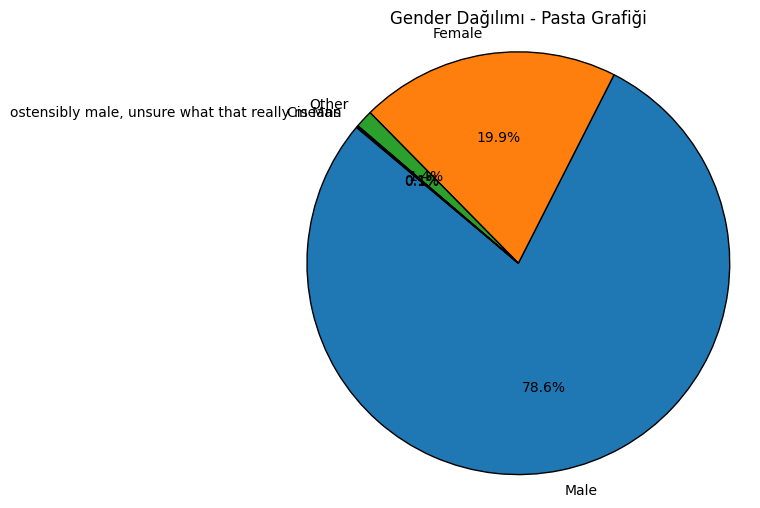

In [366]:
import matplotlib.pyplot as plt

# 'Gender' sütunundaki değerlerin sayısını alın
gender_counts = data['Gender'].value_counts()

# Pasta grafiği oluşturun
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Gender Dağılımı - Pasta Grafiği')
plt.axis('equal')  # Pasta grafiğinin daire şeklinde görünmesi için
plt.show()


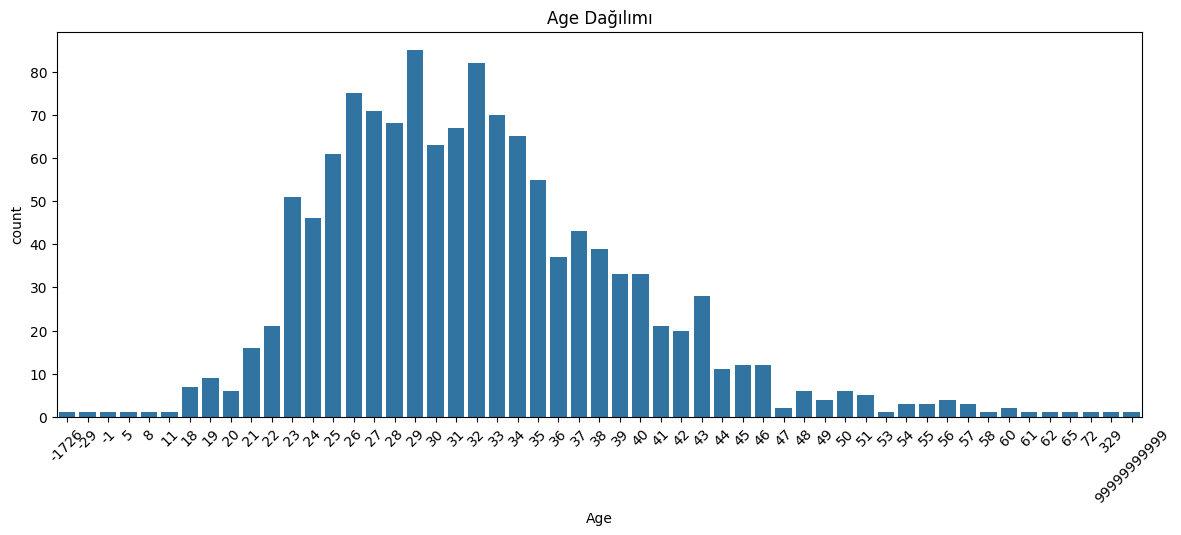

In [367]:
plt.figure(figsize=(14, 5))
sns.countplot(data=data, x='Age')
plt.xticks(rotation=45)
plt.title('Age Dağılımı')
plt.show()

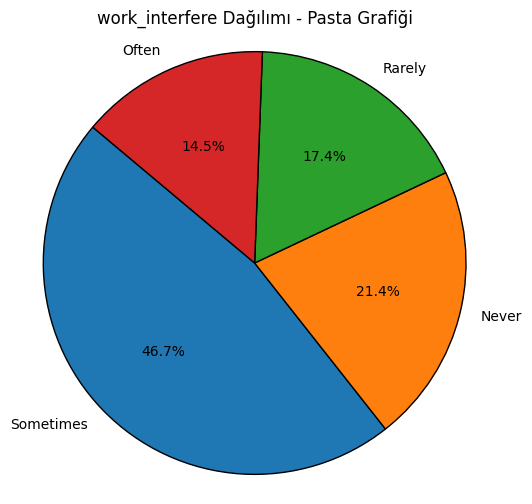

In [368]:
import matplotlib.pyplot as plt

# 'Gender' sütunundaki değerlerin sayısını alın
gender_counts = data['work_interfere'].value_counts()

# Pasta grafiği oluşturun
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('work_interfere Dağılımı - Pasta Grafiği')
plt.axis('equal')  # Pasta grafiğinin daire şeklinde görünmesi için
plt.show()

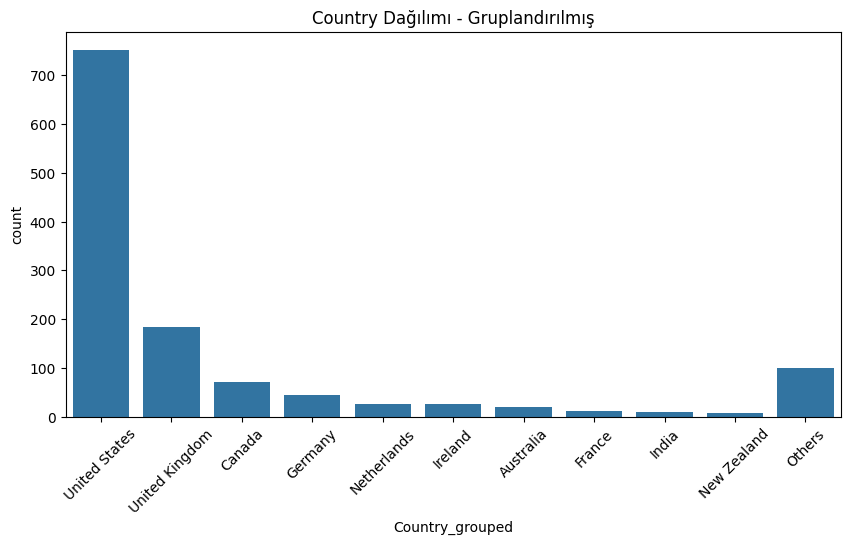

In [369]:
import matplotlib.pyplot as plt
import pandas as pd

# En çok sayıda gözleme sahip ilk 10 ülkeyi bulalım
top_countries = data['Country'].value_counts().nlargest(10)

# Bu ülkeleri "Others" ile değiştirmek için bir kopya oluştur
data['Country_grouped'] = data['Country'].apply(lambda x: x if x in top_countries.index else 'Others')

plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Country_grouped', order=top_countries.index.tolist() + ['Others'])
plt.xticks(rotation=45)
plt.title('Country Dağılımı - Gruplandırılmış')
plt.show()


İşin Ruh Sağlığına Etkisi ile Tedavi İhtiyacı: Grafik, iş yerinde yaşanan ruh sağlığı sorunlarının tedavi alma ihtiyacı üzerinde belirgin bir etkisi olduğunu gösteriyor. Özellikle "Sık sık" (Often) ve "Bazen" (Sometimes) işin ruh sağlığını etkilediğini belirten kişilerde tedavi alma oranı daha yüksek.
İşin Ruh Sağlığını Etkilemediği Durumlar: İşin ruh sağlığını "Asla" (Never) etkilemediğini belirten kişilerin büyük çoğunluğu tedavi almamış durumda. Bu da iş yerindeki baskının veya stresin, tedavi alma ihtiyacını belirgin şekilde artırdığını gösteriyor olabilir.

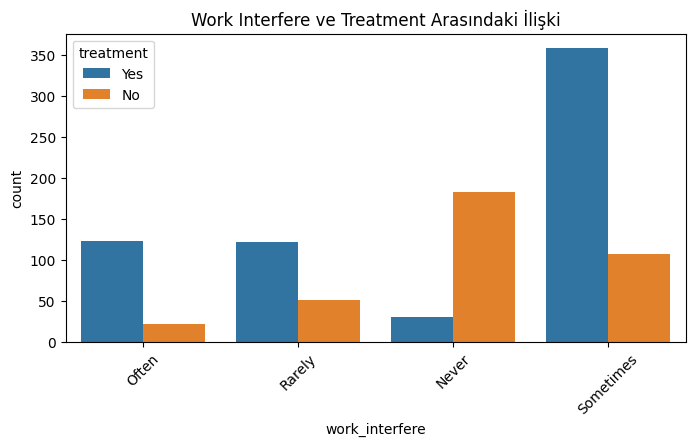

In [370]:
# 'treatment' ve 'work_interfere' arasındaki ilişkiyi görselleştirme
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='work_interfere', hue='treatment')
plt.xticks(rotation=45)
plt.title('Work Interfere ve Treatment Arasındaki İlişki')
plt.show()


Kariyer Üzerine Ruh Sağlığı Etkisi Algısı ve Tedavi İhtiyacı: Grafikte görüldüğü gibi, ruh sağlığı sorunlarının kariyer üzerinde olumsuz etkisi olacağını düşünen kişilerin tedavi alma oranı oldukça yüksek. Bu, iş ortamında ruh sağlığına önem verilmesinin ve bu tür kişilere destek sağlanmasının önemini vurguluyor.
Tedavi Almama Durumu: Ruh sağlığı sorunlarının kariyere etkisi olmadığını düşünen kişilerin tedavi almama oranı oldukça yüksek. Bu durum, kişilerin ruh sağlığı ile kariyer etkisi arasındaki algılarının tedaviye yönelimlerini belirgin bir şekilde etkilediğini gösteriyor olabilir.
Bu grafikten, iş yerinde ruh sağlığı konusundaki algının tedavi davranışlarına doğrudan etki ettiğini, özellikle de ruh sağlığı sorunlarının kariyer üzerindeki etkisi algılandığında tedaviye daha fazla başvurulduğunu söyleyebiliriz.

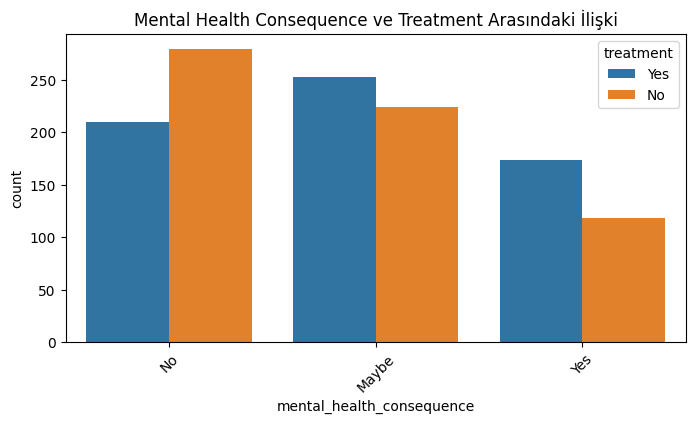

In [371]:
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='mental_health_consequence', hue='treatment')
plt.xticks(rotation=45)
plt.title('Mental Health Consequence ve Treatment Arasındaki İlişki')
plt.show()


Çoğunlukla işin ruh sağlığı üzerinde etkisi olduğunu belirten kişilerin büyük bir kısmı iş yerinde ruh sağlığı üzerine görüşme yapmamış durumda. Bu, iş yerinde ruh sağlığı hakkında konuşmanın yaygın olmadığını ve bunun da ruh sağlığı üzerinde olumsuz bir etki yaratabileceğini gösteriyor olabilir.
"Maybe" (Belki) veya "Yes" (Evet) şeklinde cevap verenlerin sayısı oldukça düşük, bu da iş yerinde ruh sağlığı konularını ele almanın çok da tercih edilmediğini veya bu konuda yeterince destek olmadığını işaret edebilir.

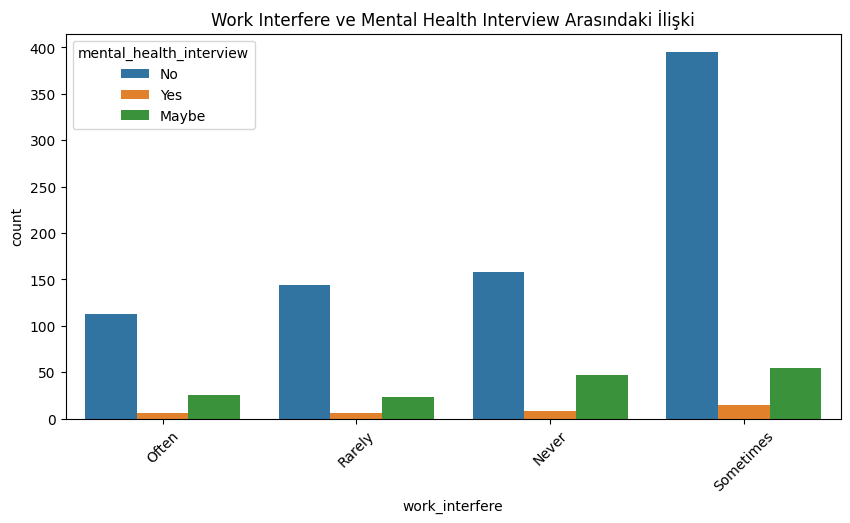

In [372]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='work_interfere', hue='mental_health_interview')
plt.xticks(rotation=45)
plt.title('Work Interfere ve Mental Health Interview Arasındaki İlişki')
plt.show()


- **Yes (Evet):**
İş yerinde fayda sağlayanların büyük bir kısmı (mavi sütun) tedavi gördüğünü belirtmiş.
Aynı grupta fayda sağlandığını ama tedavi görmediğini belirtenlerin sayısı (turuncu sütun) nispeten daha az.
Bu durum, iş yerinde fayda sunulmasının, kişilerin tedavi olma konusunda daha cesur davranmasını sağlıyor olabileceğini gösteriyor.

- **Don't Know (Bilmiyorum):**
Faydaların olup olmadığını bilmeyenler arasında tedavi görenlerin (mavi sütun) sayısı, tedavi görmeyenlere (turuncu sütun) kıyasla biraz daha az.
Bu durum, faydalar konusunda bilgi sahibi olmamanın, tedavi arayışında negatif bir etkisi olabileceğini işaret edebilir.

- **No (Hayır):**
İş yerinde fayda olmadığını belirten kişilerin neredeyse yarısı tedavi gördüğünü, diğer yarısı ise tedavi görmediğini belirtmiş.
Bu, fayda olmamasının tedavi arayışına doğrudan bir etkisi olmadığını gösteriyor olabilir veya farklı bir etkileyici faktörün devrede olduğunu gösterebilir.

- **Çıkarımlar:**
Fayda Sağlanan Ortam: İş yerinde fayda sağlandığında, tedavi arayışına yönelik bir eğilim gözlemlenmiş. Bu da iş yerinde fayda sunmanın ruh sağlığı konusunda daha fazla destek ve cesaret oluşturabileceğine işaret ediyor.
Belirsizlik: İş yerindeki faydaların olup olmadığını bilmeyenler arasında, tedavi görenlerin oranının daha düşük olması, faydalarla ilgili bilinçlenmenin ruh sağlığı desteği almak üzerinde pozitif etkisi olabileceğini gösteriyor olabilir.
Fayda Olmayan Ortam: Fayda olmayan ortamlarda tedavi arayışının daha dengeli olduğu görülüyor. Bu durum, iş yerinde fayda olmamasının kişilerin tedaviye yönelmesi konusunda doğrudan bir engel olmadığı, ancak faydaların sunulmasının tedaviye erişim konusunda önemli bir fark yaratabileceği anlamına gelebilir.

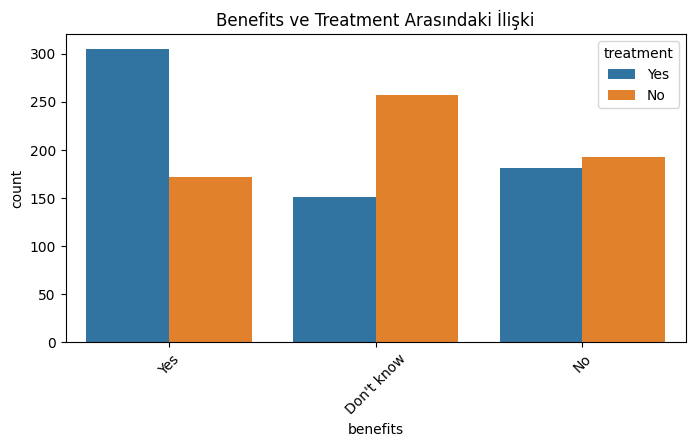

In [373]:
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='benefits', hue='treatment')
plt.xticks(rotation=45)
plt.title('Benefits ve Treatment Arasındaki İlişki')
plt.show()


İzin Almanın Kolaylığı: Çalışanların ruh sağlığı nedeniyle izin almanın kolay olup olmadığını bilmeleri, tedavi arayışını etkileyen önemli bir faktör gibi görünüyor.
İzin Süreci Bilgisi: "Bilmiyorum" diyen çalışanların tedaviye yönelme oranlarının düşük olması, çalışanların izin süreçleri hakkında daha iyi bilgilendirilmelerinin ruh sağlığı tedavisi arayışını artırabileceğini gösteriyor.
İzin Almanın Zor Olduğu Durumlar: İzin sürecinin zor olması durumunda, tedavi gören kişi sayısının belirgin şekilde az olması, bu durumun tedavi arayışında bir engel oluşturduğunu işaret edebilir.

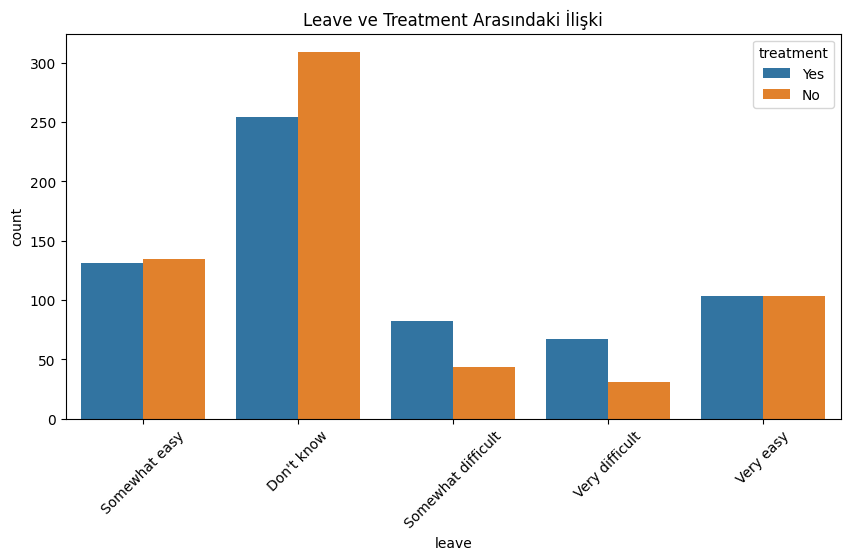

In [374]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='leave', hue='treatment')
plt.xticks(rotation=45)
plt.title('Leave ve Treatment Arasındaki İlişki')
plt.show()


**Family History = No (Aile Geçmişi Yok):**
Bu kategoride tedavi görmeyenlerin (turuncu) sayısı tedavi görenlerden (mavi) oldukça fazladır.
Bu durum, ailede ruh sağlığı geçmişi olmayan kişilerin ruh sağlığı tedavisi alma oranının daha düşük olduğunu göstermektedir. Tedavi arayışında daha az teşvik edici bir faktör olabilir.


**Family History = Yes (Aile Geçmişi Var):**
Aile geçmişinde ruh sağlığı sorunu bulunan kişiler arasında tedavi görenlerin sayısı (mavi), tedavi görmeyenlere göre oldukça fazladır.
Bu durum, aile geçmişinde ruh sağlığı sorunu bulunan kişilerin, bu konuda daha fazla farkındalık sahibi oldukları ve tedavi arayışına daha yatkın olduklarını göstermektedir. Aileden gelen bilgi veya bilinç, tedavi sürecine olumlu etki edebilir.


**Çıkarımlar:**
Aile Geçmişinin Önemi: Ailede ruh sağlığı geçmişinin bulunması, kişinin ruh sağlığı konusunda daha bilinçli ve tedaviye yatkın olmasına neden olabilir.
Tedavi Arayışı: Aile geçmişinde ruh sağlığı problemi olmayanların tedavi arayışında daha az bulunması, ruh sağlığı konusunda bilincin düşük olduğunu veya tedaviye başvurmanın gerekli görülmediğini gösterebilir.
Öneri: Ruh sağlığı konusunda farkındalık yaratmak ve aile geçmişi olmayan bireylerin de ruh sağlığı problemlerinde destek aramalarını teşvik etmek önemli olabilir. Bu sayede, tedavi arayışında eşit fırsatlar sağlanabilir ve ruh sağlığı genel anlamda iyileştirilebilir.
Grafik, ruh sağlığı tedavisi alma kararında aile geçmişinin etkili bir faktör olduğunu ve bu konuda farkındalığın önemli olduğunu göstermektedir.

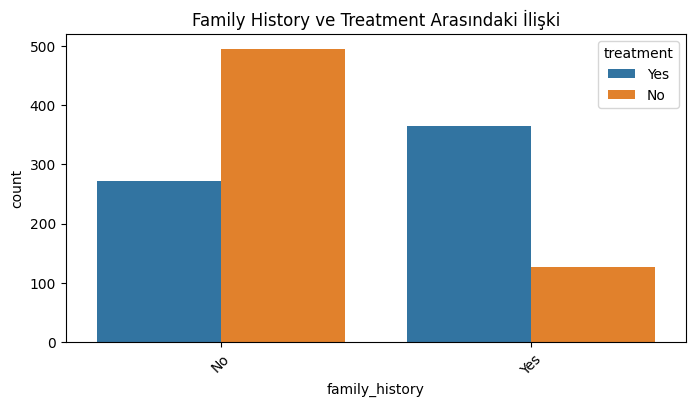

In [375]:
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='family_history', hue='treatment')
plt.xticks(rotation=45)
plt.title('Family History ve Treatment Arasındaki İlişki')
plt.show()


Kadın ve Tedavi Eğilimi: Kadınların, ruh sağlığı problemleriyle ilgili daha fazla destek aradığı ve tedaviye daha fazla başvurduğu gözlemlenebilir.
Erkek ve Tedavi Eğilimi: Erkeklerin, tedaviye başvurma oranının düşük olması, toplumsal beklentiler veya ruh sağlığı konusundaki farkındalık eksikliğinden kaynaklanabilir.
Diğer Cinsiyetler: Non-binary veya diğer cinsiyet kimliklerinde örnek sayısı oldukça düşük olsa da tedaviye başvurma eğilimi var gibi görünüyor.

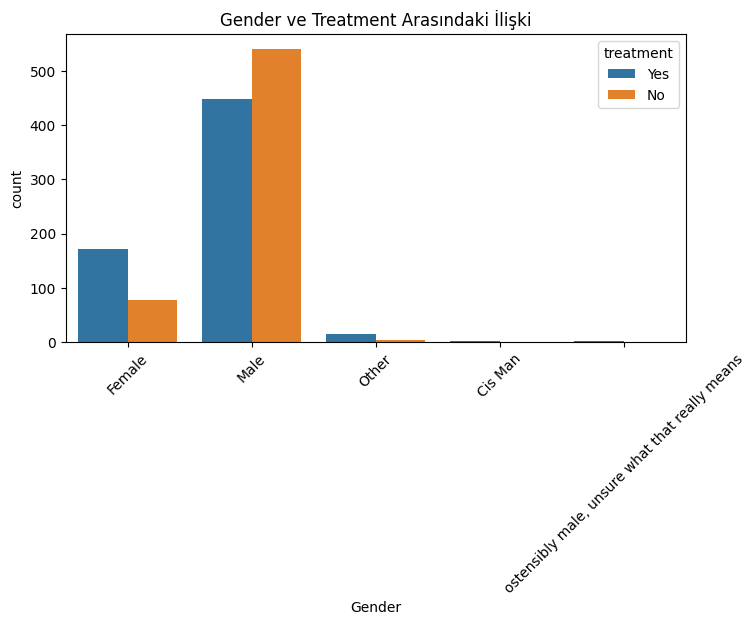

In [376]:
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='Gender', hue='treatment')
plt.xticks(rotation=45)
plt.title('Gender ve Treatment Arasındaki İlişki')
plt.show()


Bu korelasyon matrisi, veri setinizdeki sayısal sütunlar arasındaki korelasyonları göstermektedir. Korelasyon, iki değişken arasındaki doğrusal ilişkinin gücünü ve yönünü ifade eder. Bu korelasyon matrisi, her bir çift değişken arasındaki korelasyon katsayılarını gösterir. Korelasyon katsayısının değer aralığı -1 ile 1 arasındadır:

- **1**: Mükemmel pozitif korelasyon. Bir değişken arttığında diğeri de aynı oranda artar.
- **-1**: Mükemmel negatif korelasyon. Bir değişken arttığında diğeri aynı oranda azalır.
- **0**: İki değişken arasında doğrusal bir ilişki yoktur.

Korelasyon matrisinde renkler de bu katsayıları görsel olarak daha kolay anlamamıza yardımcı olur:

- **Koyu kırmızı (1'e yakın)**: Güçlü pozitif ilişki.
- **Koyu mavi (-1'e yakın)**: Güçlü negatif ilişki.
- **Açık renkler (0'a yakın)**: Zayıf veya hiç ilişki yok.

**Sonuçları yorumlayalım:**

1. **Age ile diğer değişkenler**: "Age" değişkeni diğer değişkenlerle oldukça düşük korelasyona sahip. Bu, yaşın diğer değişkenler üzerinde çok belirgin bir etkisi olmadığını gösteriyor.

2. **Gender ile treatment**: Korelasyon katsayısı -0.15, yani cinsiyet ile tedavi arasında hafif negatif bir ilişki var. Bu, cinsiyetin (örneğin, kadın veya erkek olmanın) tedavi alma eğilimini bir miktar etkileyebileceğini ancak bu etkinin zayıf olduğunu gösteriyor.

3. **family_history ve treatment**: Korelasyon katsayısı 0.38. Bu iki değişken arasında orta derecede pozitif bir ilişki olduğunu gösteriyor. Yani ailede geçmişte bir ruh sağlığı problemi olması, kişinin tedavi alma ihtimalini artırabilir.

4. **work_interfere ve treatment**: Korelasyon katsayısı -0.036, çok düşük bir korelasyon var. Bu da işteki müdahalenin tedavi alma ile belirgin bir ilişkisinin olmadığını gösteriyor.

5. **benefits ve treatment**: Korelasyon katsayısı 0.23. Bu, "benefits" (faydalar) ve tedavi arasında hafif pozitif bir ilişki olduğunu gösteriyor. Yani çalışanlara sunulan avantajlar, tedavi alma ihtimalini biraz artırabilir.

Bu korelasyon matrisi bize hangi değişkenler arasında ilişki olabileceğini ve bu ilişkilerin ne kadar güçlü olduğunu göstermektedir. Düşük korelasyon değerleri, iki değişken arasında belirgin bir doğrusal ilişki olmadığını, yüksek pozitif ya da negatif korelasyon değerleri ise iki değişkenin birbirini güçlü bir şekilde etkileyebileceğini gösterir. Ancak, bu ilişki nedensellik anlamına gelmez; yani iki değişken arasında korelasyon olması, birinin diğerine neden olduğu anlamına gelmez.

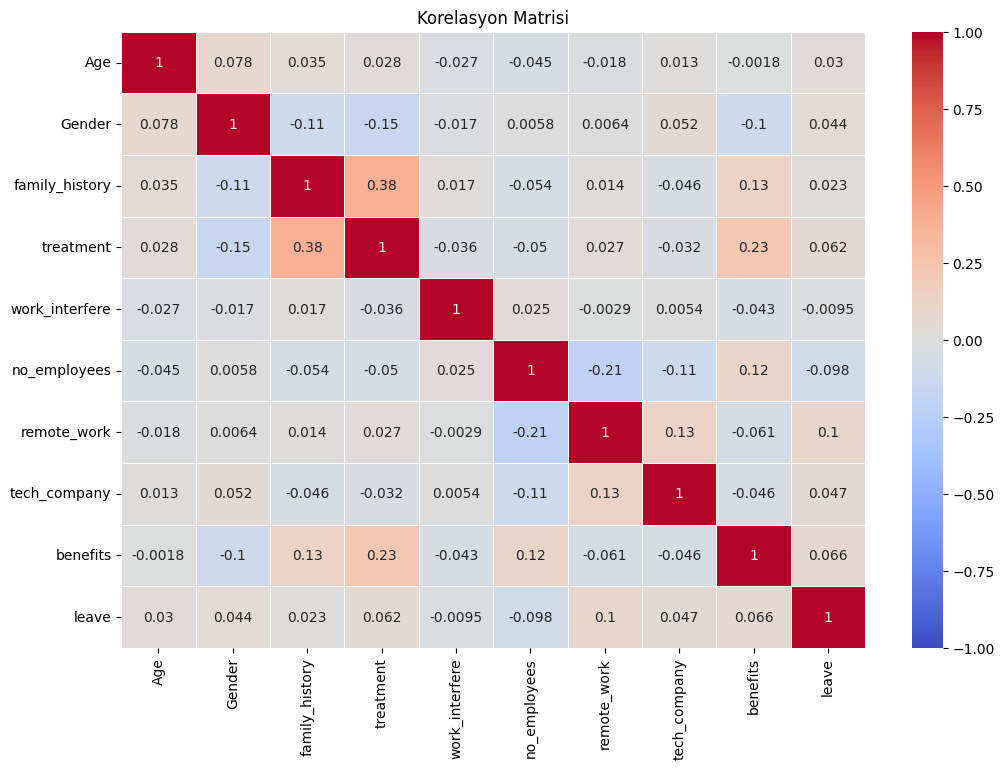

In [377]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Kategorik sütunları sayısala dönüştürmek için LabelEncoder kullanımı
encoder = LabelEncoder()

# Kategorik sütunları sayısala dönüştür
categorical_columns = ['Gender', 'family_history', 'treatment', 'work_interfere', 'leave', 'no_employees', 'remote_work', 'tech_company', 'benefits']

for column in categorical_columns:
    if column in data.columns:
        data[column] = encoder.fit_transform(data[column].astype(str))

# Sayısal sütunları seçin
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini oluşturun
correlation_matrix = numeric_data.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Korelasyon Matrisi')
plt.show()



In [378]:
# İlk olarak IQR yöntemi ile aykırı değerleri tespit edelim
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
print(f'Q1: {Q1}, Q3: {Q3}, IQR: {IQR}')

# Alt ve üst sınırları belirleyelim
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Aykırı değerleri belirleyelim
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]

print(outliers)




Q1: 27.0, Q3: 36.0, IQR: 9.0
                Timestamp          Age  Gender         Country state  \
38    2014-08-27 11:42:08           50       2   United States    IN   
143   2014-08-27 12:39:14          -29       2   United States    MN   
294   2014-08-27 14:15:57           56       2   United States   NaN   
297   2014-08-27 14:18:41           60       2   United States    CA   
347   2014-08-27 14:45:45           54       2   United States    CA   
364   2014-08-27 15:05:21          329       2   United States    OH   
372   2014-08-27 15:21:59           55       2   United States    PA   
390   2014-08-27 15:24:47  99999999999       3        Zimbabwe   NaN   
419   2014-08-27 15:31:40           55       2   United States    ID   
466   2014-08-27 16:06:46           57       2   United States    CA   
471   2014-08-27 16:13:40           58       2   United States    CA   
475   2014-08-27 16:15:26           57       2   United States    CA   
498   2014-08-27 16:28:20          

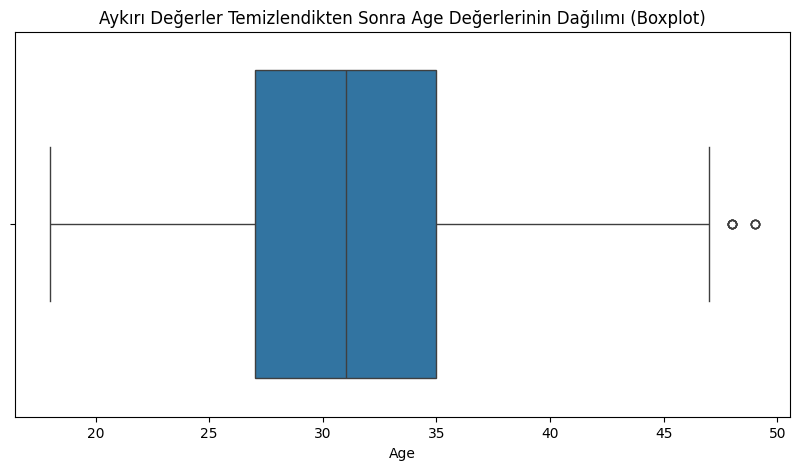

In [379]:
# Alt ve üst sınırların dışında kalan aykırı değerleri filtreleyelim
filtered_data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]
# Aykırı değerleri temizledikten sonra boxplot oluşturmak
plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_data, x='Age')
plt.title('Aykırı Değerler Temizlendikten Sonra Age Değerlerinin Dağılımı (Boxplot)')
plt.show()


**Pairplot (Çift Değişkenli Dağılım Grafikleri)**

**İkili İlişkiler:**
Grafikte, her iki değişken arasındaki dağılımı görebileceğiniz nokta grafikleri (scatter plots) yer alır.
Bu grafikler, iki değişken arasındaki ilişkiyi gözlemlemenize olanak tanır. Eğer bir doğrusal eğilim varsa, bu iki değişken arasında bir korelasyon olduğunu söyleyebiliriz.
Örneğin, üst üste kümelenmiş noktalar varsa, bu bir korelasyonun varlığına işaret edebilir. Ancak burada nokta kümelerinin belirgin bir doğrusal şekil sergileyip sergilemediğini incelemek gerekir.

**Dağılımlar:**
Diyagonal boyunca yer alan grafikler, her bir değişkenin dağılımını gösterir ve KDE (Kernel Density Estimate) olarak verilmiştir. KDE eğrisi, değişkenin değerlerinin olasılık yoğunluğunu gösterir.
Bu dağılımlar, verinizin simetrik olup olmadığını veya çok sayıda aykırı değere sahip olup olmadığını incelemek için faydalıdır.

**Aykırı Değerler:**
Scatter plotlarda belirli bölgelerden ayrı duran noktalar varsa, bu noktalar olası aykırı değerleri gösterir. Bu aykırı değerler, verilerin analizinde hataya neden olabilir ve bunları ele almak gerekebilir.
Korelasyonlar:

Bazı değişkenler arasında pozitif ya da negatif bir eğilim görebilirsiniz. Örneğin, yukarıya ya da sağa doğru eğimli bir çizgi, pozitif bir korelasyonu gösterirken, aşağıya doğru bir eğilim negatif korelasyonu gösterebilir.
Ancak bu grafikte herhangi bir net doğrusal ilişki görünmüyor gibi; bu durumda, değişkenler arasında güçlü bir korelasyonun olmadığı ya da ilişki türünün doğrusal olmadığı söylenebilir.

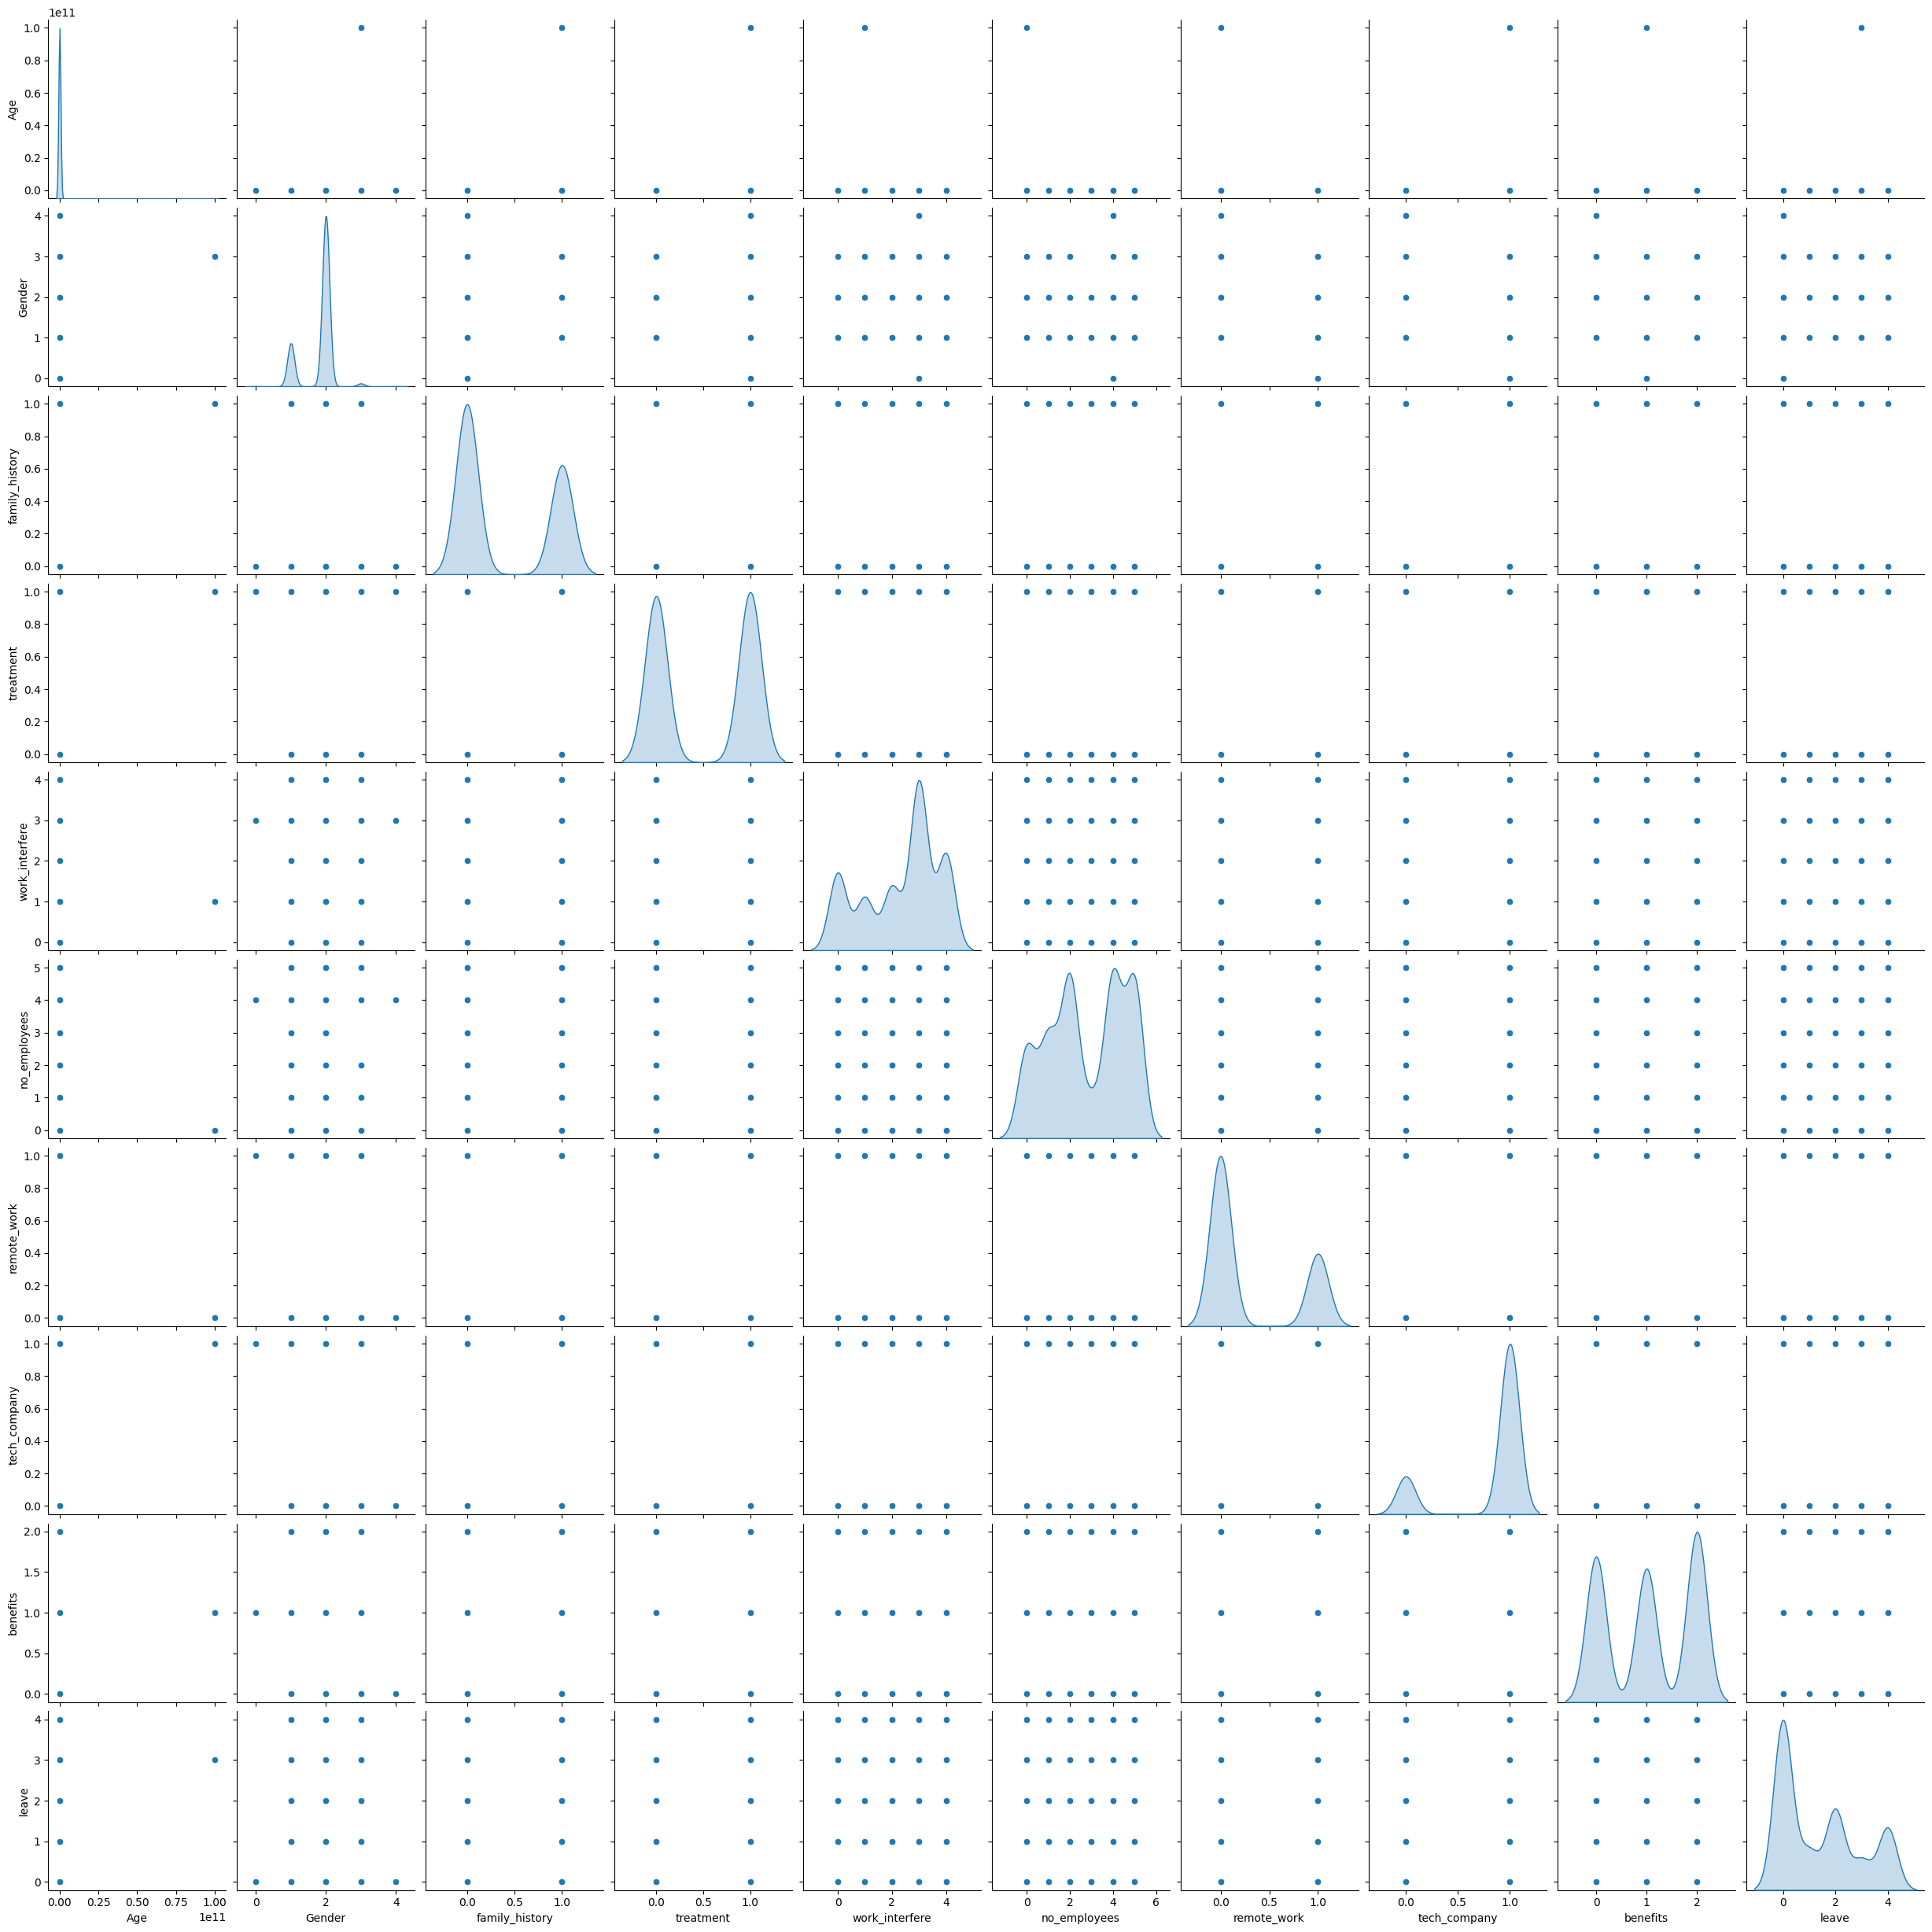

In [380]:
sns.pairplot(numeric_data, diag_kind='kde')
plt.show()


4. Özellik Mühendisliği (Feature Engineering):
Özellik mühendisliği, model performansını artırmak için var olan özellikleri dönüştürmek ve yeni özellikler oluşturmaktır. Bu adımda neler yapacağımıza bakalım:

Adım 1: Yeni Özellikler Oluşturma:
Yeni anlamlı özellikler oluşturarak modelin daha fazla bilgi edinmesini sağlayabiliriz.

In [381]:
# İş-yaşam dengesi özelliklerinin türetilmesi
data['work_life_balance'] = data['work_interfere'].apply(lambda x: 'Poor' if x in ['Often', 'Sometimes'] else 'Good')

# Aile geçmişi ve tedavi durumunu birleştirerek yeni bir özellik oluşturma
data['family_treatment'] = data['family_history'].astype(str) + ' - ' + data['treatment'].astype(str)



Adım 2: Kategorik Değişkenlerin Kodlanması:
Makine öğrenimi algoritmaları genellikle sayısal verilerle çalıştığı için, kategorik değişkenleri sayısal verilere dönüştürmemiz gerekiyor.

In [382]:
from sklearn.preprocessing import LabelEncoder

# Kategorik özellikleri sayısallaştırma
kategorik_sutunlar = ['Gender', 'family_history', 'treatment', 'work_interfere', 'remote_work', 'tech_company', 'benefits', 'leave']
label_encoder = LabelEncoder()

for sutun in kategorik_sutunlar:
    data[sutun] = label_encoder.fit_transform(data[sutun])


Adım 3: Özelliklerin Ölçeklendirilmesi (Scaling):
Gradient tabanlı algoritmalarla (Lojistik Regresyon, Yapay Sinir Ağları gibi) çalışırken, verilerin ölçeklendirilmesi önemlidir. Bu nedenle, özellikleri aynı ölçeğe getirmek için MinMaxScaler kullanabiliriz.

In [383]:
from sklearn.preprocessing import MinMaxScaler

# Sayısal sütunları belirleyin
sayisal_sutunlar = data.select_dtypes(include=['int64', 'float64']).columns

# Min-Max ölçekleyici uygulayın
scaler = MinMaxScaler()
data[sayisal_sutunlar] = scaler.fit_transform(data[sayisal_sutunlar])


Adım 4: Aykırı Değerlerin İşlenmesi:
Verideki aykırı değerler modelin doğruluğunu olumsuz etkileyebilir. Bu nedenle aykırı değerleri tespit edip yönetmek önemlidir. Bu adımı, örneğin z-score yöntemi kullanarak yapabiliriz.

In [384]:
from scipy import stats
import numpy as np

# Aykırı değerleri tespit et ve temizle
z_scores = np.abs(stats.zscore(data[sayisal_sutunlar]))
data = data[(z_scores < 3).all(axis=1)]


Adım 5: Eksik Verilerin Tamamlanması (Imputation)
Eksik veri olan sütunlarda eksiklikleri uygun şekilde doldurmalıyız. Bu, modelin daha verimli öğrenmesini sağlayabilir.

Sayısal sütunları ortalama (mean) ile, kategorik sütunları ise mod (most frequent) ile doldurabiliriz.

In [385]:
from sklearn.impute import SimpleImputer

# Sayısal sütunlardaki eksik değerleri doldurma
sayisal_imputer = SimpleImputer(strategy='mean')
data[sayisal_sutunlar] = sayisal_imputer.fit_transform(data[sayisal_sutunlar])

# Kategorik sütunlardaki eksik değerleri doldurma
kategorik_imputer = SimpleImputer(strategy='most_frequent')
data[kategorik_sutunlar] = kategorik_imputer.fit_transform(data[kategorik_sutunlar])


Adım 6: Yeni Özelliklerin Oluşturulması:
Verinin içeriğine ve anlamına göre daha fazla özellik türetilebilir.

Çalışma Süresi Kategorileştirme: Çalışma süresi (örneğin, no_employees) gibi bir sütunu, çalışan sayısına göre kategorilere ayırabilirsiniz.

In [386]:
# Çalışan sayısına göre kategorileştirme
def calisan_sayisi_kategori(x):
    if x < 10:
        return 'Küçük Şirket'
    elif x < 50:
        return 'Orta Şirket'
    else:
        return 'Büyük Şirket'

data['calisan_sinifi'] = data['no_employees'].apply(calisan_sayisi_kategori)


Adım 7: Polinom Özellikler Türetme:
Modelin doğrusal olmayan ilişkileri öğrenebilmesini sağlamak için polinom özellikler türetilebilir.

In [336]:
from sklearn.preprocessing import PolynomialFeatures

# Polinom özellikler türetme (derece 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data[sayisal_sutunlar])

# Polinom özellikleri veri kümesine ekleme
data_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(sayisal_sutunlar))
data = pd.concat([data.reset_index(drop=True), data_poly], axis=1)


Adım 8: Özellik Seçimi (Feature Selection):
Tüm özelliklerin kullanılması bazen modelin fazla karmaşık olmasına veya fazla uyum sağlamasına (overfitting) yol açabilir. Bu nedenle, bazı gereksiz veya düşük önem derecesine sahip özellikleri kaldırabiliriz.

RFE (Recursive Feature Elimination): Geriye dönük olarak önem derecesine göre özellikleri seçebiliriz.

In [403]:
# Yalnızca sayısal sütunları seç
X = data.select_dtypes(include=['int64', 'float64'])
y = data['treatment']

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Özellik seçimi için RFE kullanımı
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=1)
rfe_selector = rfe_selector.fit(X, y)

# Seçilen özellikleri veri kümesinde tutma
selected_features = X.columns[rfe_selector.support_]
data = data[selected_features]



#### 5.Model Geliştirme ve Eğitme (Model Development and Training): 
makine öğrenmesi modelinizi geliştirecek, eğitecek ve modelin performansını değerlendireceksiniz

In [409]:
X = data.drop(columns=["treatment"])  # Özellikler
y = data["treatment"]  # Hedef sütun
# Hedef sütunu encode etme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [410]:
# Random Forest Classifier modeli oluşturma
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Tahmin yapma
y_pred = rf_model.predict(X_test)
# Sonuçları değerlendirme
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8055555555555556

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.75      0.79       124
         1.0       0.78      0.86      0.82       128

    accuracy                           0.81       252
   macro avg       0.81      0.80      0.80       252
weighted avg       0.81      0.81      0.80       252



In [412]:
# Özellik önem düzeylerini inceleme
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nÖzellik Önem Düzeyleri:")
print(importance_df)



Özellik Önem Düzeyleri:
          Feature  Importance
3  work_interfere    0.494916
4    no_employees    0.120901
8           leave    0.105396
2  family_history    0.097049
7        benefits    0.075542
1          Gender    0.043797
5     remote_work    0.037025
6    tech_company    0.025373
0             Age    0.000000


In [413]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Random Forest modeli oluşturma
rf_model = RandomForestClassifier(random_state=42)

# 5 katlı çapraz doğrulama kullanarak doğruluğu hesaplayın
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# Sonuçları yazdırın
print("Cross Validation Scores:", cv_scores)
print("Average Cross Validation Score:", cv_scores.mean())


Cross Validation Scores: [0.77777778 0.77290837 0.80876494 0.79681275 0.75697211]
Average Cross Validation Score: 0.7826471890216912


In [414]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Hiperparametre arama için GridSearchCV kullanımı
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest modelini tanımlama
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV tanımlama
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Modeli eğitme
grid_search.fit(X_train, y_train)

# En iyi hiperparametreleri yazdırma
print("En iyi Hiperparametreler:", grid_search.best_params_)

# En iyi modeli kullanarak tahmin yapma
y_pred_best = grid_search.best_estimator_.predict(X_test)

# Modelin performansını değerlendirme
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy (En iyi model):", accuracy_score(y_test, y_pred_best))
print("\nClassification Report (En iyi model):\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


c:\Users\iremg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
410 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\iremg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\iremg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c

En iyi Hiperparametreler: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
Accuracy (En iyi model): 0.8095238095238095

Classification Report (En iyi model):
               precision    recall  f1-score   support

         0.0       0.87      0.72      0.79       124
         1.0       0.77      0.90      0.83       128

    accuracy                           0.81       252
   macro avg       0.82      0.81      0.81       252
weighted avg       0.82      0.81      0.81       252



In [415]:
train_accuracy = accuracy_score(y_train, grid_search.best_estimator_.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_best)

print("Eğitim Seti Doğruluğu:", train_accuracy)
print("Test Seti Doğruluğu:", test_accuracy)


Eğitim Seti Doğruluğu: 0.8745019920318725
Test Seti Doğruluğu: 0.8095238095238095


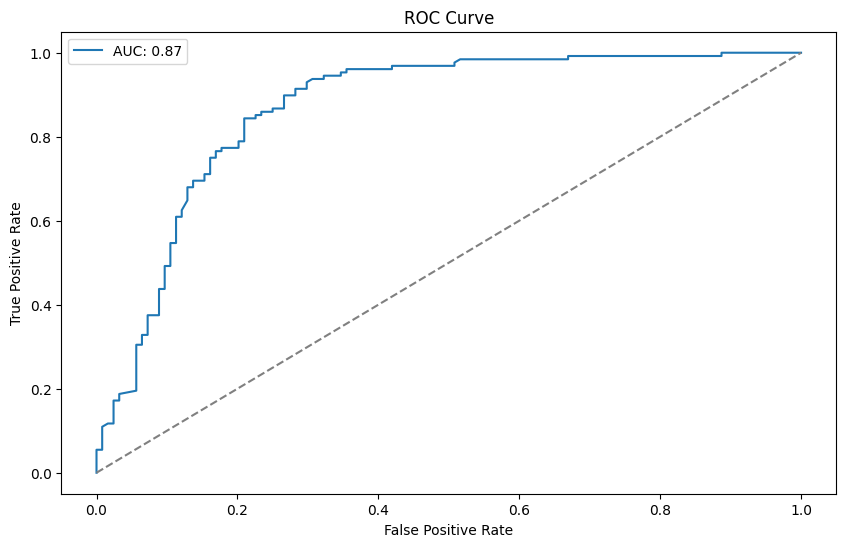

In [416]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"AUC: {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


          Feature  Importance
3  work_interfere    0.606358
2  family_history    0.128986
7        benefits    0.073472
4    no_employees    0.062827
8           leave    0.054562
1          Gender    0.037172
5     remote_work    0.020072
6    tech_company    0.016550
0             Age    0.000000


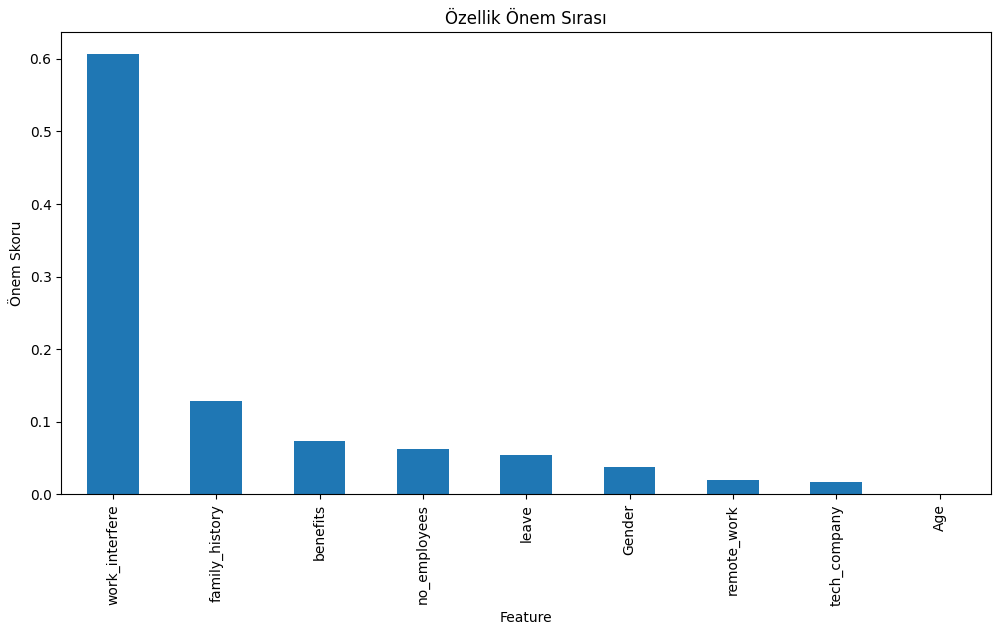

In [417]:
import pandas as pd

feature_importances = grid_search.best_estimator_.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# Görselleştirme
importance_df.plot(kind='bar', x='Feature', y='Importance', figsize=(12, 6), legend=False)
plt.title("Özellik Önem Sırası")
plt.ylabel("Önem Skoru")
plt.show()



Bu Confusion Matrix çıktısı, modelin sınıflandırma performansını detaylı bir şekilde analiz etmemizi sağlar. Grafikte şunlar görülebilir:

Confusion Matrix Anlamı:
- True Negatives (TN):

Sol üst köşe (89): Gerçek sınıf Class 0 ve modelin tahmini de Class 0.
Modelin doğru şekilde negatif sınıf tahmini yaptığı örnekler.
- false Positives (FP):

Sağ üst köşe (35): Gerçek sınıf Class 0, ancak model yanlışlıkla Class 1 tahmin etmiş.
Modelin yanlış pozitif tahmin yaptığı örnekler (false alarm).
- False Negatives (FN):

Sol alt köşe (13): Gerçek sınıf Class 1, ancak model yanlışlıkla Class 0 tahmin etmiş.
Modelin negatif sınıfı yanlış tahmin ettiği örnekler.
- True Positives (TP):

Sağ alt köşe (115): Gerçek sınıf Class 1 ve modelin tahmini de Class 1.
Modelin doğru şekilde pozitif sınıf tahmini yaptığı örnekler.

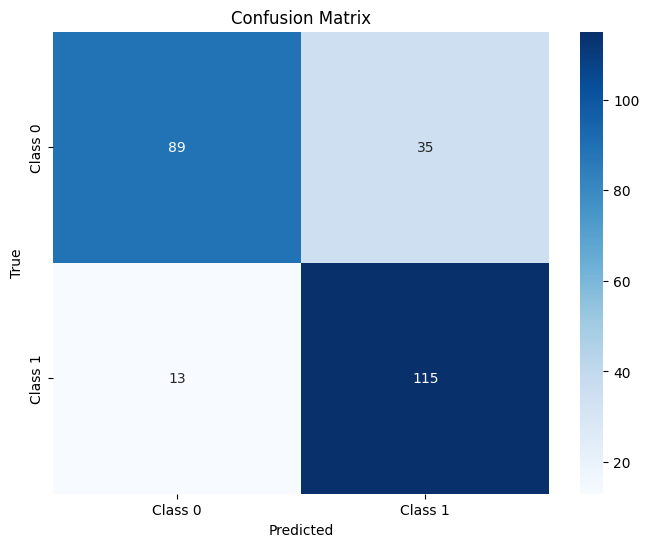

In [418]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [419]:
import pandas as pd

# Gerçek ve tahmin edilen etiketleri bir DataFrame'e ekleyin
test_results = X_test.copy()
test_results['True Label'] = y_test
test_results['Predicted Label'] = y_pred_best

# FP (False Positive): Gerçek sınıf 0, tahmin edilen sınıf 1
false_positives = test_results[(test_results['True Label'] == 0) & (test_results['Predicted Label'] == 1)]

# FN (False Negative): Gerçek sınıf 1, tahmin edilen sınıf 0
false_negatives = test_results[(test_results['True Label'] == 1) & (test_results['Predicted Label'] == 0)]


In [420]:
# False Positive örneklerinin istatistiklerini görüntüleyin
print("False Positives:")
print(false_positives.describe())

# False Negative örneklerinin istatistiklerini görüntüleyin
print("False Negatives:")
print(false_negatives.describe())


False Positives:
                Age     Gender  family_history  work_interfere  no_employees  \
count  3.500000e+01  35.000000       35.000000       35.000000     35.000000   
mean   1.756657e-08   0.485714        0.371429        0.642857      0.617143   
std    6.291651e-11   0.058876        0.490241        0.174534      0.364196   
min    1.744000e-08   0.250000        0.000000        0.250000      0.000000   
25%    1.752500e-08   0.500000        0.000000        0.500000      0.400000   
50%    1.756000e-08   0.500000        0.000000        0.750000      0.800000   
75%    1.762000e-08   0.500000        1.000000        0.750000      0.900000   
max    1.768000e-08   0.500000        1.000000        0.750000      1.000000   

       remote_work  tech_company   benefits      leave  True Label  \
count    35.000000     35.000000  35.000000  35.000000        35.0   
mean      0.314286      0.857143   0.542857   0.242857         0.0   
std       0.471008      0.355036   0.390539   0.3120

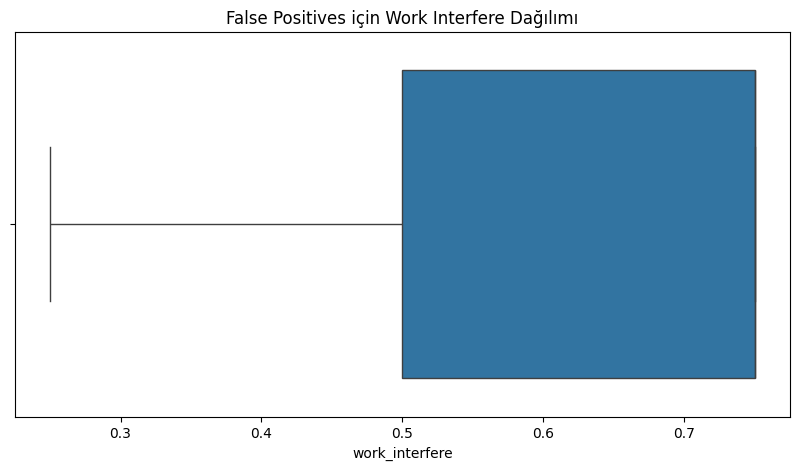

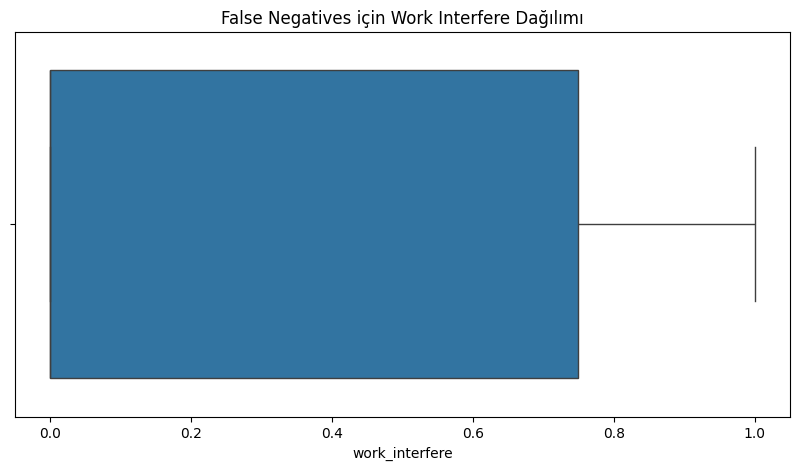

In [421]:
import seaborn as sns
import matplotlib.pyplot as plt

# Örneğin, "work_interfere" özelliği için FP ve FN'yi görselleştirin
plt.figure(figsize=(10, 5))
sns.boxplot(data=false_positives, x='work_interfere')
plt.title("False Positives için Work Interfere Dağılımı")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=false_negatives, x='work_interfere')
plt.title("False Negatives için Work Interfere Dağılımı")
plt.show()


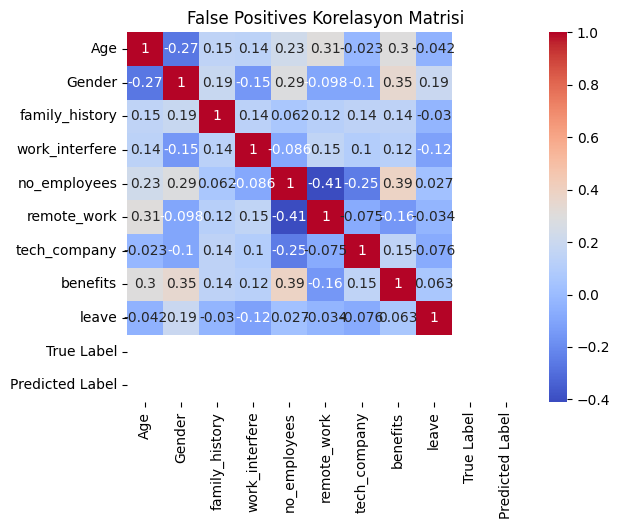

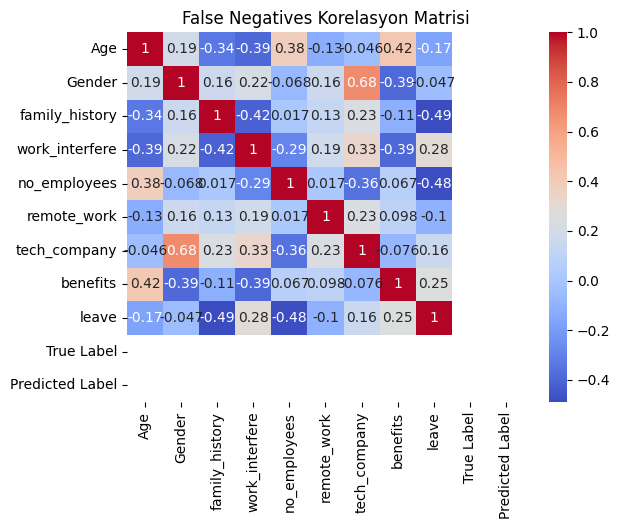

In [422]:
# FP örneklerinde korelasyon analizi
fp_corr = false_positives.corr()
sns.heatmap(fp_corr, annot=True, cmap='coolwarm')
plt.title("False Positives Korelasyon Matrisi")
plt.show()

# FN örneklerinde korelasyon analizi
fn_corr = false_negatives.corr()
sns.heatmap(fn_corr, annot=True, cmap='coolwarm')
plt.title("False Negatives Korelasyon Matrisi")
plt.show()
